In [1]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

Temperatura prevista para o dia 11: 30.71°C


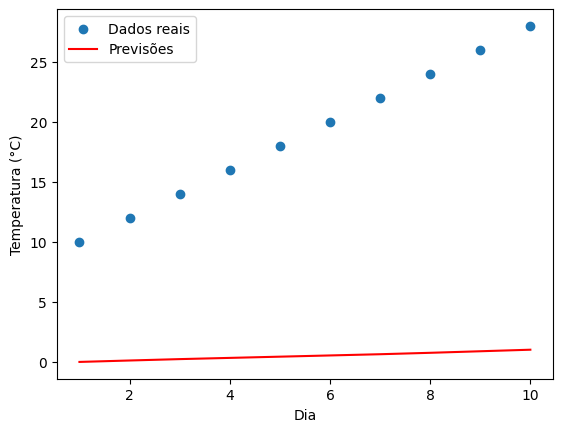

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo (substitua por seus próprios dados)
temperaturas = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])
dias = np.arange(1, 11)

# Normalização dos dados
temperaturas_normalizadas = (temperaturas - np.min(temperaturas)) / (np.max(temperaturas) - np.min(temperaturas))

# Convertendo para tensores do PyTorch
X = torch.tensor(dias, dtype=torch.float32).view(-1, 1)
y = torch.tensor(temperaturas_normalizadas, dtype=torch.float32).view(-1, 1)

# Definindo a rede neural
class MinhaRede(nn.Module):
    def __init__(self):
        super(MinhaRede, self).__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

# Instanciando a rede
rede = MinhaRede()

# Definindo função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(rede.parameters(), lr=0.01)

# Treinamento da rede
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = rede(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Previsão para um novo dia
novo_dia = torch.tensor([[11]], dtype=torch.float32)
previsao = rede(novo_dia)
temperatura_prevista = previsao.item() * (np.max(temperaturas) - np.min(temperaturas)) + np.min(temperaturas)

print(f"Temperatura prevista para o dia 11: {temperatura_prevista:.2f}°C")

# Plotando os resultados
plt.scatter(dias, temperaturas, label="Dados reais")
plt.plot(dias, rede(X).detach().numpy(), label="Previsões", color='red')
plt.xlabel("Dia")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()
